In [4]:
import glob
len(glob.glob('./fonts/*/*.*'))

224

In [1]:
from trdg.generators import GeneratorFromWikipedia
GeneratorFromWikipedia?

2025-08-08 14:45:07.523851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754653507.539258     977 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754653507.544054     977 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754653507.556206     977 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754653507.556229     977 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754653507.556231     977 computation_placer.cc:177] computation placer alr

Missing modules for handwritten text generation.


Init signature:
GeneratorFromWikipedia(
    count: int = -1,
    minimum_length: int = 1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
)
Docstring:      Generator that uses sentences taken from random Wikipedia

In [124]:
row_idx = 0

ERROR! Session/line number was not unique in database. History logging moved to new session 22


In [4]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
import glob
import numpy as np
from matplotlib import pyplot as plt
import random 
import tqdm
from concurrent.futures import ThreadPoolExecutor
import os

def save_image_and_label(img, label, filename_base):
    img.save(f"{filename_base}.jpg")
    with open(f"{filename_base}.txt", "w", encoding="utf-8") as f:
        f.write(label)

        
executor = ThreadPoolExecutor(max_workers=16)


font_list = glob.glob('./fonts/*/*.*')


print('loading fonts and text')
generator = GeneratorFromStrings(
    # ['בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש', 'בדיקה אחד שתיים שלוש'],
    # [row['translation1'], row['translation2']], 
    list(ds['train']['translation1'])[0:10000],
    size=128,
    skewing_angle=3,
    random_skew=True,
    blur=1,
    random_blur=True,
    fonts = font_list,
    rtl=True, 
    language="he",
    margins=(25, 25, 25, 25),
)

print('generating')

counter = 0
for img, lbl in tqdm.tqdm(generator):
    if img:
        # executor.submit(img.save(f"./dataset_0/{row_idx:0{12}d}_part_1.jpg"))

        filename_base = f"./dataset_0/{row_idx:0{12}d}_part_2"
        executor.submit(save_image_and_label, img, lbl, filename_base)
        
        

    row_idx += 1
    counter += 1
    if counter == 10000:
        break

    

executor.shutdown()  # Ensure all saves finish


loading fonts and text


NameError: name 'ds' is not defined

In [121]:
lbl

'אז בכל מקרה, אולי הוא ישים את ווילי הורטון הזה על הכרטיס אחרי הכול.'

In [116]:
executor.shutdown()  # Ensure all saves finish

In [113]:
len()

300150

In [108]:
ds['train'][2]

{'original_annotator_labels': "['entailment']",
 'genre': 'government',
 'original_label': 'entailment',
 'pairID': '63601e',
 'promptID': 63601,
 'sentence1': 'As agreed with the participants, the purpose of the discussion was not to reach a consensus, but rather to engage in an open, no attribution-based dialogue.',
 'translation1': 'כפי שסוכם עם המשתתפים, מטרת הדיון לא הייתה להגיע לקונצנזוס, אלא לעסוק בדיאלוג פתוח ללא ייחוס.',
 'sentence2': 'An agreement was made with participants to ensure that the discussion would involve open dialogue.',
 'translation2': 'הוסכם עם המשתתפים לוודא שהדיון יכלול שיח פתוח.',
 'hebrew_label': None}

In [104]:
len(ds['train'])

300150

In [1]:
pip uninstall trdg -y

Found existing installation: trdg 1.8.0
Uninstalling trdg-1.8.0:
  Successfully uninstalled trdg-1.8.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --no-deps -e ./

Obtaining file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator
  Preparing metadata (setup.py) ... done
  DEPRECATION: Legacy editable install of trdg==1.8.0 from file:///mnt/g/ml_projects/ocr/TextRecognitionDataGenerator (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for trdg
Note: you may need to restart the kernel to use updated packages.


# tasks
- longer text that makes sense
- drop line (both in img and lbl)
- english --> skip + keep (2 versions)
- handwriting only dataset

['./fonts/alefalefalef/DanaYadAlefAlefAlef-Normal.otf']


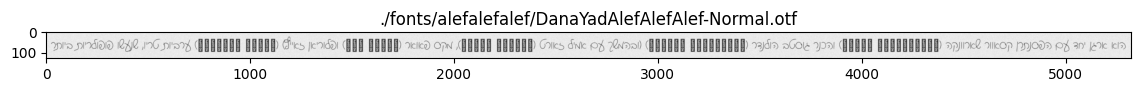

['./fonts/alefalefalef/GveretLevinAlefAlefAlef-Regular.otf']


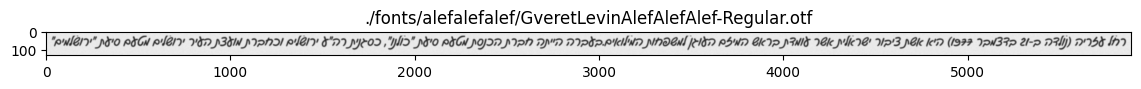

['./fonts/alefalefalef/heshbon-bold-alefalefalef.otf']


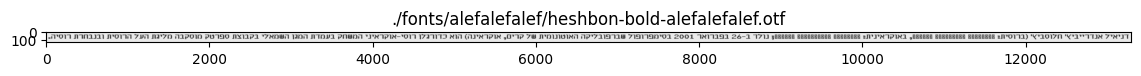

In [11]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)
import glob
import numpy as np
from matplotlib import pyplot as plt

font_list = glob.glob('./fonts/*/*.*')[0:3]
for i in range(len(font_list)):
    print([font_list[i]])
    generator = GeneratorFromWikipedia(
        # ['בדיקה אחד שתיים שלוש'],
        minimum_length=25,
        size=128,
        random_skew=True,
        blur=2,
        random_blur=True,
        fonts = [font_list[i]],
        rtl=True, 
        language="he",
        margins=(25, 25, 25, 25),
    )
    
    for img, lbl in generator:
        # if img:
        #     img.save("with-rtl.png")
        plt.figure(figsize=(14,14))
        plt.title(font_list[i])
        plt.imshow(np.array(img))
        plt.show()
        break 

In [7]:
GeneratorFromWikipedia?

Init signature:
GeneratorFromWikipedia(
    count: int = -1,
    minimum_length: int = 1,
    fonts: List[str] = [],
    language: str = 'en',
    size: int = 32,
    skewing_angle: int = 0,
    random_skew: bool = False,
    blur: int = 0,
    random_blur: bool = False,
    background_type: int = 0,
    distorsion_type: int = 0,
    distorsion_orientation: int = 0,
    is_handwritten: bool = False,
    width: int = -1,
    alignment: int = 1,
    text_color: str = '#282828',
    orientation: int = 0,
    space_width: float = 1.0,
    character_spacing: int = 0,
    margins: Tuple[int, int, int, int] = (5, 5, 5, 5),
    fit: bool = False,
    output_mask: bool = False,
    word_split: bool = False,
    image_dir: str = '/mnt/g/ml_projects/ocr/TextRecognitionDataGenerator/trdg/generators/images',
    stroke_width: int = 0,
    stroke_fill: str = '#282828',
    image_mode: str = 'RGB',
    output_bboxes: int = 0,
    rtl: bool = False,
)
Docstring:      Generator that uses sentences take

In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.7 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 26.7 MB/s  0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.
